In [9]:
#show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Project 1 - OLS

This project is meant to revisit some concepts from linear algebra you have already encountered in the past. It is also designed to help you get accustomed with Jupyter and Python 3.



## Anaconda

Before you start, make sure you install the [Anaconda](https://www.anaconda.com/download) Python distribution, which contains essentially all of the code you will need for this course. Please do not use other installations of Python, and install the version for Python 3, not Python 2. Also, if you install new Python packages later on, do not mix package installation methods, unless you know very thoroughly what you are doing (for instance, do not use `pip` to install new software, only use `conda`). This will save you big headaches as the semester progresses.


### Working with Cells

A _cell_ is a block of content. There are a few different types of cell, but we will be concerned maily with `Markdown` cells and `Code` cells. The former contain text, including mathematics, and the latter contain snippets of code (Python 3 for us, although notebooks can deal with any programming language).

When you run a `Markdown` cell, its contents are formatted and displayed. A `Markdown` cell can also contain straight HTML code. However, there won't be any need for this in this course.

When you run a `Code` cell, the code in it is executed in the current _kernel_, and any output from it is displayed after the cell. Any object created during execution (variables, function definitions,...) remains alive in the kernel, so you can assign a value to a variable in one cell and access it in a later cell. You can do various things to the kernel, such as restart it, interrupt it, and so forth. Please browse the `Kernel` menu at the top of the page.

To make, edit, delete, run, and do several other things to and with cells, you use the commands in the `Edit`, `View`, `Insert`, `Cell` menus. Look at these menus and try out some of the commands. The icons just below the menus are shortcuts for some of the more common commands.

In `Markdown` cells, all text except mathematics is formatted with _Markdown_ syntax, a simplified document annotation language. The mathematics is enclosed between dollar signs when it is inline with the text like the equation $\frac{de^x}{dx} = e^x$, and between double dollar signs when it is displayed in the middle of a line on its own, like this:

$$\int_0^{\infty} e^{x} dx = 1$$

(look at the source of this text to see how this works). The easiest way to figure our how Markdown and LaTeX work is to look at the source of this notebook to see how text and math were composed, and how code was entered.

> For your reference, here is [a list of Markdown syntax elements](https://www.markdownguide.org/cheat-sheet/)
>
> For your reference, here is [a list of LaTeX commands for mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

After you make changes to a cell, you can see the results of your changes by selecting `Cell->Run Cells` or `Cell->Run All`. The first command runs only the cell you are in, or the cells you select. The second command runs all the cells in the notebook. The `Run` button in the menu bar is a shortcut for `Cell->Run Cells`.




## Fitting Polynomials

You will fit a degree-$k$ polynomial
$$ h(x) = c_0 + c_1 x + \ldots + c_k x^k $$
for various values of $k$ to a set
$$ T = \{(x_0, y_0), \ldots, (x_{N-1}, y_{N-1}) \}$$
of data samples, each sample containing two real numbers. We number the $N$ samples from $0$ to $N-1$ rather than from $1$ to $N$ to avoid confusion with Python-style subscripts, which start at $0$. Note that a polynomial of degree $k$ has $k+1$ coefficients.

To review the theory, the goal is to pick the vector
$$ \mathbf{c} = [c_0, \ldots, c_k]^T $$
of coefficients that minimize the _quadratic risk_
$$L_T(\mathbf{c}) = \sum_{n=0}^{N-1} [y_n - h(x_n)]^2\;.$$
In the expression for $\mathbf{c}$ above, the $T$ superscript denotes transposition, so we think of $\mathbf{c}$ as a column vector.

When this problem is solved, the sample $(x_n, y_n)$ yields the following _linear_ equation in the unknowns:
$$ c_0 1 + c_1 x_n + \ldots + c_k x_n^k = y_n $$
which can be written in vector form as follows:
$$ \mathbf{x}_n^T \mathbf{c} = y_n $$
where we define
$$ \mathbf{x}_n = [1, x_n, \ldots, x_n^k]^T \;.$$

We can now form the $N\times (k+1)$ matrix and $N\times 1$ vector
$$ A = \left[\begin{array}{c} \mathbf{x}_0^T\\\vdots\\\mathbf{x}_{N-1}^T \end{array}\right] \;\;\;\text{and}\;\;\;
\mathbf{a} = \left[\begin{array}{c} y_0\\\vdots\\y_{N-1} \end{array}\right] $$
and write the linear system
$$ A \mathbf{c} = \mathbf{a} $$
of $N$ equations in $k+1$ unknowns, to be solved in the least-squares sense:
$$\widehat{\mathbf{c}} \;\in\; \arg\min_{\mathbf{c}} \|A \mathbf{c} - \mathbf{a}\|^2\;.$$
This system may be under-determined, exact ($A$ is square and full rank), or over-determined, so it may admit zero, one, or infinitely many solutions.

### Part 1: The Under-Determined Case

Let $N = 1$ and $k = 1$, so that we are fitting a straight line to one sample point $(x_0, y_0)$. There are infinitely many lines through a single point, so we expect infinitely many solutions.

---
#### Problem 1.1

> Spell out the system $$A \mathbf{c} = \mathbf{a}$$ for this special case.

That is, write out the equation explicitly in terms of $x_0$, $y_0$, $c_0$, and $c_1$. Do _not_ use matrix notation.


**ANSWER**  

$ c_0 + c_1x_0 = y_0 $

---
#### Problem 1.2

> Give expressions for two different possible solutions $\mathbf{c}$ to this equation in terms of $x_0$ and $y_0$.

There are infinitely many correct answers (and even more wrong ones!), just pick two easy ones. Make sure that your expressions work even if $x_0$ or $y_0$ (or both) are zero.

**ANSWER**  
First possible solution: $ c = [y_0, 0]^T$  

Second possible solution: $ c = [y_0(1-x_0), y_0]^T $ 


---
#### Problem 1.3

> Write and run Python code to draw, in a single plot, the two lines corresponding to the two solutions you gave when $$(x_0, y_0) = (2, 1).$$

To help you, the plotting function `show` is defined for you, and is written so that it will work also for more complex cases later on. The function `show` takes `numpy` vectors `x` and `y`, which together represent a training set $T$, and a list `cList` of `numpy` vectors of polynomial coefficients. It then plots the training points as well as each polynomial in the list. For this problem, `x` and `y` contain a single number each, and `cList` contains the two vectors $\mathbf{c}'$ and $\mathbf{c}''$. A commented-out example is given for how the function is to be called for this problem, with just one (arbitrary) vector $\mathbf{c}$ in the list.

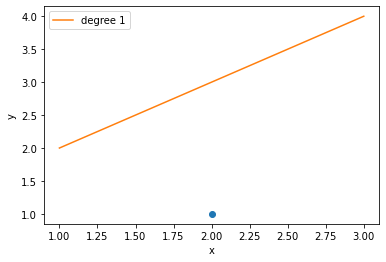

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def show(x, y, cList = []):
    plt.ion()
    plt.plot(x, y, marker='.', markersize=12, ls='')
    npt = 100
    xrange = [x - 1, x + 1] if x.size == 1 else [np.amin(x), np.amax(x)]
    xFine = np.linspace(xrange[0], xrange[1], npt)
    for c in cList:
        nc = c.size
        ycFine = np.zeros(xFine.shape)
        xPow = np.ones(xFine.shape)
        for i in range(nc):
            ycFine += c.item(i) * xPow
            xPow *= xFine
        plt.plot(xFine, ycFine, label = 'degree ' + str(nc-1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
# Usage example
p = [2, 1]
show(np.array(p[0]), np.array(p[1]), [np.array([1, 1])])

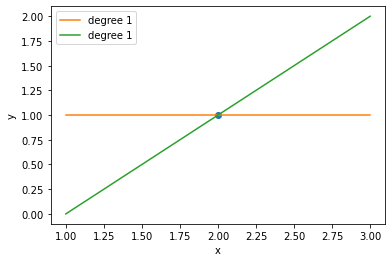

In [11]:
#ANSWER
p = [2, 1]
show(np.array(p[0]), np.array(p[1]), [np.array([1, 0]), np.array([-1,1])])

##### Programming Note:

You may wonder why the code above says `c.item(i)` rather than `c[i]`. The reason is that the latter version will not work when `nc`$=1$. In that case, `c` is what `numpy` calls a "zero-dimensional array", and therefore it expects zero subscripts, while the expression `c[i]` uses one subscript. The notation `c.item(i)` works even in that case.

Some may argue that this is a bug rather than a feature of the `numpy` package. While expecting a number of subscripts equal to the number of dimensions is a good concept, the behavior with zero-dimensional arrays often surprises programmers with unexpected error messages (`IndexError: too many indices for array`).

### Part 2: Interpolation

Let us now consider the case $N = 2$ and $k = 1$: Fitting a straight line to two points $(x_0, y_0)$ and $(x_1, y_1)$. We assume that the line is not vertical, that is, that
$$x_0 \neq x_1 \;,$$
so that it can be written in the form
$$ c_0 + c_1 x = y \;.$$
There is one such line, so we expect exactly one solution. You may remember from geometry that the line between these two points has equation
$$ y - y_0 = \frac{y_1 - y_0}{x_1 - x_0}\ (x - x_0) $$

---
#### Problem 2.1

> Derive this last equation from the system
> $$A\mathbf{c} = \mathbf{a}$$
> spelled out for this special case.


Specifically, spell out this system for $N = 2$ and $k = 1$, similarly to what you did earlier, and solve the system by Gaussian elimination and back-substitution. Plug the values of $c_0$ and $c_1$ into the line equation and rearrange the resulting expression to derive the second equation for the line given above. Show your work.

**ANSWER**
$$ c_0 + c_1x = y $$
$$A\mathbf{c} = 
\left[\begin{array}{cc}1 & x_0\\1 & x_1\end{array}\right]
\left[\begin{array}{c}c_0\\c_1\end{array}\right]
=\
\left[\begin{array}{c}y_0\\y_1\end{array}\right]
= \mathbf{a}$$

solve the system by Gaussian elimination: 

$$\left[\begin{array}{cc|c}1 & x_0 & y_0\\1 & x_1 & y_1\end{array}\right]
\rightarrow
\left[\begin{array}{cc|c}1 & x_0 & y_0\\0 & x_1 - x_0 & y_1-y_0\end{array}\right]$$

Thus $c_0 + c_1x_0 = y_0$ and $ c_0(x_1-x_0) = y_1 - y_0$
The equations for $c_0$ and $c_1$ are: 

$ c_0 = y_0 - c_1x_0$  and  $ c_1 = \frac{y_1 - y_0}{x_1-x_0}$ ,thus $c_0 = y_0 - \frac{y_1 - y_0}{x_1-x_0}x_0$

Substituting $c_0$ and $c_1$ into the first equation: 

$y_0 - \frac{y_1 - y_0}{x_1-x_0}x_0 + \frac{y_1 - y_0}{x_1-x_0}x = y \Longrightarrow y - y_0 = \frac{y_1 - y_0}{x_1 - x_0}\ (x - x_0) $

### Part 3: The Over-Determined Case

Finally, let us consider the over-determined case through an example with $N = 3$ and $k=1$: Fitting a straight line to three points.

We want to write the line in the form
$$ c_0 + c_1 x = y $$
and therefore we must assume that $x_0, x_1, x_2$ are not all equal to each other (or else the line would be vertical).

Then the matrix $A$ is full rank. The system admits an exact solution only if the three points happen to be aligned. We want a more general solution, so we solve the system in the Least-Squares sense.

Recall from linear algebra that the unique Least-Squares solution to the over-determined, full-rank system
$$A \mathbf{c} = \mathbf{a}$$
is the solution to the _normal equations_
$$ A^T A \mathbf{c} = A^T \mathbf{a} \;.$$

The key advantage of this system over the original one is that the matrix $A^T A$ is full rank (because $A$ is full rank), and can therefore be inverted. In our case, the matrix $A^T A$ is $2\times 2$, so we can invert it by hand.

To simplify the notation in the manipulations that follow, make the following definitions:

\begin{eqnarray*}
X &=& \sum_{n=0}^{N-1} x_n \\
Y &=& \sum_{n=0}^{N-1} y_n \\
S &=& \sum_{n=0}^{N-1} x_n^2 \\
P &=& \sum_{n=0}^{N-1} x_n y_n
\end{eqnarray*}


---
#### Problem 3.1

> Write the matrix $A^T A$ and vector $A^T \mathbf{a}$ in terms of $N, X, Y, S, P$ for the special case $k=1$.

The value of $N$ does not matter, since $N$ is hidden by the definitions above.

**ANSWER**
$$ A^T A\ 
=\
\left[\begin{array}{ccc}1 & 1 & 1\\x_0 & x_1 & x_2 \end{array}\right]\
\left[\begin{array}{cc}1 & x_0\\1 & x_1\\ 1 & x_2\end{array}\right]\
=\
\left[\begin{array}{cc}N & X\\ X & S\end{array}\right]$$

$$ A^T\mathbf{a} 
=\ 
\left[\begin{array}{ccc}1 & 1 & 1\\x_0 & x_1 & x_2 \end{array}\right]\
\left[\begin{array}{c}y_0\\y_1\\y_2 \end{array}\right]\
=\ 
\left[\begin{array}{c}Y\\P\end{array}\right]
$$ 

---
#### Problem 3.2

> Find expressions for $c_0$ and $c_1$ in terms of $N, X, Y, S, P$ by solving the normal equations. Recall that
> $$\left[\begin{array}{cc}a & b\\c & d \end{array}\right]^{-1} \;=\; 
\frac{1}{ad-bc}\ \left[\begin{array}{rr}d & -b\\-c & a \end{array}\right]$$

**ANSWER**
We solve $ A^T A \mathbf{c} = A^T \mathbf{a}$

Multiplying both sides by the inverse of $A^T A$  
$ (A^T A)^{-1} (A^T A) \mathbf{c} = (A^T A)^{-1} A^T \mathbf{a} $  
$\mathbf{c} = (A^T A)^{-1} A^T \mathbf{a} $

Using the definition of the the inverse of a 2x2 matrix we have,

$\left[\begin{array}{cc}a & b\\c & d \end{array}\right]^{-1} \;=\; 
\frac{1}{ad-bc}\ \left[\begin{array}{rr}d & -b\\-c & a \end{array}\right]$  

$ (A^T A)^{-1} =\ \left[\begin{array}{cc}N & X\\ X & S\end{array}\right]^{-1}
=\ \frac{1}{NS - X^2} \left[\begin{array}{cc}S & -X\\ -X & N\end{array}\right]$  
Thus,  

$\mathbf{c} 
=\left[\begin{array}{c}c_0\\ c_1\end{array}\right]
=\frac{1}{NS - X^2} 
\left[\begin{array}{cc}S & -X\\ -X & N\end{array}\right]
\left[\begin{array}{c}Y\\P\end{array}\right]
=\frac{1}{NS - X^2} 
\left[\begin{array}{c}SY - XP\\ -XY + NP\end{array}\right]$


---
#### Problem 3.3

> Use the function `show` given earlier to display the three points $(0, -1), (1, 1), (3, 0)$ and the line fit to them with the formulas you just found for $c_0$ and $c_1$.

Show your code, the numerical values of $c_0$ and $c_1$ with three decimal digits after the period, and the resulting figure.

(Hint: It's less error prone to use Python to compute and print $c_0$ and $c_1$, but if you want to do that by hand that's OK, too.)

c0 = -0.286
c1 = 0.214


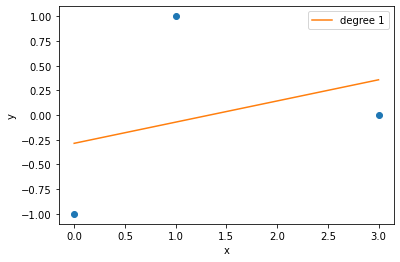

In [12]:
#ANSWER
import numpy as np
import matplotlib.pyplot as plt

def show(x, y, cList = []):
    plt.ion()
    plt.plot(x, y, marker='.', markersize=12, ls='')
    npt = 100
    xrange = [x - 1, x + 1] if x.size == 1 else [np.amin(x), np.amax(x)]
    xFine = np.linspace(xrange[0], xrange[1], npt)
    for c in cList:
        nc = c.size
        ycFine = np.zeros(xFine.shape)
        xPow = np.ones(xFine.shape)
        for i in range(nc):
            ycFine += c.item(i) * xPow
            xPow *= xFine
        plt.plot(xFine, ycFine, label = 'degree ' + str(nc-1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
# Usage example
p = [0, -1, 1, 1, 3, 0]
N = 3 
X = 4 
Y = 0
S = 10
P = 1
coeff = 1 / ((N*S) - (X**2))
c0 = coeff * (S*Y - X*P)
c1 = coeff * (-X*Y + N*P)
print("c0 = {:.3f}".format(c0))
print("c1 = {:.3f}".format(c1))
show(np.array([p[0], p[2], p[4]]), np.array([p[1], p[3], p[5]]), [np.array([c0, c1])])

### Programming Aside: Data Input and List Comprehensions

**If you are comfortable with Python 3 and `numpy`, you may skip this section.**

Let us first load the data set $T$ from file `T.txt` into a `numpy` array. We use the `loadtxt` function to load the data, since `T.txt` is a text file with two numbers per row.

Read the [documentation of `loadtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). Do this for other functions as well, we won't keep telling you. Google is your friend.

Let's also assume that we want to fit a quadratic polynomial ($k = 2$), and that we want to assemble the matrix $A$.

In [13]:
x, y = np.loadtxt('T.txt', unpack=True)
N, k = len(y), 2

The `unpack` flag transposes the array, so that every item in even position (starting at 0) in the original array, that is all items in the first row of the transposed array, goes into `x` and every other item goes into `y`. A `numpy` vector makes no distinction between row and column vectors, so there is no need to transpose the results `x` and `y`.

For later reference, `N` is the number of samples and `k` is the degree of the desired polynomial.

If all works well, you should see no result. To check what happened you could display the pair `(x, y)` with the following command (parentheses are not needed, but can be added without consequence):

In [14]:
x, y

(array([0.   , 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889,
        1.   ]),
 array([2.03 , 3.606, 4.266, 3.132, 3.4  , 2.3  , 1.768, 0.934, 1.534,
        2.7  ]))

To make the array $A$, list comprehensions come in handy. The code below makes the desired array as a Python list of lists (no `numpy`) and uses the result to initialize a `numpy` array.

In [15]:
A = np.array([[x.item(i) ** j for j in range(k+1)] for i in range(N)])
A

array([[1.      , 0.      , 0.      ],
       [1.      , 0.111   , 0.012321],
       [1.      , 0.222   , 0.049284],
       [1.      , 0.333   , 0.110889],
       [1.      , 0.444   , 0.197136],
       [1.      , 0.556   , 0.309136],
       [1.      , 0.667   , 0.444889],
       [1.      , 0.778   , 0.605284],
       [1.      , 0.889   , 0.790321],
       [1.      , 1.      , 1.      ]])

If list comprehensions confuse you, just use `for` loops, but the code becomes more complicated and less efficient:

In [16]:
A = np.zeros((N, k+1))
for i in range(N):
    for j in range(k+1):
        A[i, j] = x.item(i) ** j
A

array([[1.      , 0.      , 0.      ],
       [1.      , 0.111   , 0.012321],
       [1.      , 0.222   , 0.049284],
       [1.      , 0.333   , 0.110889],
       [1.      , 0.444   , 0.197136],
       [1.      , 0.556   , 0.309136],
       [1.      , 0.667   , 0.444889],
       [1.      , 0.778   , 0.605284],
       [1.      , 0.889   , 0.790321],
       [1.      , 1.      , 1.      ]])

The result is the same.

Initially, a good way to understand list comprehensions is to first write the loop version, then rewrite it "inside out" as a comprehension.

### Part 4: Numerical Data Fitting

The examples in the previous parts were useful to refresh your memory about basic concepts from linear algebra, and to understand when a polynomial fitting problem has 0, 1, or infinitely many solutions. When the degree of the polynomial is greater than 1, however, calculations by hand become impractical or impossible.

Instead, we always solve the linear system
$$
A \mathbf{c} = \mathbf{a}
$$
in the Least-Square sense (that is, as a minimization problem), and we always use a numerical package. When there is exactly one solution, we obtain just that (the "least square" is 0). When there are infinitely many solutions, we obtain one of them, and which one we get depends on the solution method used.

A good way to make the solution unique in all cases is to stipulate that whenever multiple solutions are available the one of _minimum norm_ is returned. "Norm" here refers to the Euclidean norm of the vector $\mathbf{c}$. The function `numpy.linalg.lstsq` returns the minimum-norm solution when multiple solutions exist, and it achieves this result by using the singular value decomposition of $A$.

---
#### Problem 4.1

> In problem 1.3 you found two different solutions to a data fitting problem. Let us call the corresponding coefficient vectors $\mathbf{c}$ and $\mathbf{d}$. Write the values of $\mathbf{c}$ and $\mathbf{d}$, and report their norms. Which is smaller?

Your answer may vary, as it depends on which lines you came up with in 1.3. If you write code (computation by hand is OK, too), you may want to use `numpy.linalg.norm` to compute the norm of `numpy` arrays.

In [17]:
c = np.array([1, 0])
d = np.array([-1,1])

c_norm = np.linalg.norm(c)
d_norm = np.linalg.norm(d)

print("c = ", c)
print("d = ", d)
print("The norm of c is {:f}".format(c_norm))
print("The norm of d is {:f}".format(d_norm))
print("In conclusion, the norm of c is smaller than the norm of d")

c =  [1 0]
d =  [-1  1]
The norm of c is 1.000000
The norm of d is 1.414214
In conclusion, the norm of c is smaller than the norm of d


---
#### Problem 4.2

> Write a function with header
>
>    `def fit(x, y, k):`
>
> that fits a polynomial of degree `k` to the data in `x` and `y`.

This function takes `numpy` vectors `x` and `y` with $N$ coordinates each and a degree `k` (a nonnegative integer), and returns a `numpy` vector `c` with the coefficients of the polynomial of degree `k` that fits the points `(x[n], y[n])` best in the Least-Squares sense. The vector of coefficients should have minimum norm when multiple solutions are available, so use `numpy.linalg.lstsq`. Show your code.

##### Programming Notes

To solve the linear system $A\mathbf{c} = \mathbf{a}$, call `numpy.linalg.lstsq` as follows:

    c = np.linalg.lstsq(A, a, rcond=None)[0]
    
The `rcond=None` option silences a warning message that has to do with the matrix condition number. The `[0]` at the end picks only the first out of four different data structures returned by the function. We don't need the other three in this assignment.

Your code should work also when `k` is zero (fitting a constant), so make sure you use `.item(i)` rather than `[i]` for indexing `numpy` arrays wherever the issue described in the programming note after Problem 1.3 is relevant.

Your code should also work when a single point is passed (so that `x.size` and `y.size` are equal to $N=1$). This corner case reveals another quirk of `numpy`. Specifically, the matrix $A$ in that case has a single row (and is possibly a single number if $k=0$ as well). However, `numpy.linalg.lstsq` expects its first argument to be a two-dimensional array, while we now have a zero- or one-dimensional array. This will raise an error when the function is called if you use `np.array` to hold your data.

Instead, use `np.matrix`, which distinguishes between row vectors and column vectors, and handles low-dimensional matrices more gracefully for linear algebra applications. We pass `np.array` arguments to `fit` because these are the more commonly used containers and are more convenient to use in several ways. Because of this, you need to cast `np.array` objects to `np.matrix` objects inside `fit`. If `arr` is an `np.array`, just say

    mat = np.matrix(arr)
    
to make a matrix `mat` out of it. If `arr` is a one-dimensional array, to make sure that the corresponding matrix has a single _column_, rather than a single row, you need to explicitly reshape the result:

    col = np.reshape(np.matrix(arr), [arr.size, 1])

In [18]:
def fit(x,y,k):
    N = len(y)
    arr = np.zeros((N, k+1))
    
    for i in range(N):
        for j in range(k+1):
            arr[i, j] = x.item(i) ** j
        
        
    A = np.matrix(arr)
    a = np.reshape(y, [y.size, 1])
    c = np.linalg.lstsq(A, a, rcond=None)[0]
    return c
    

---
#### Problem 4.3

> Show the plot and output obtained with the following code, where `fit` is your function. The file `T.txt` should be in the same directory as your notebook.

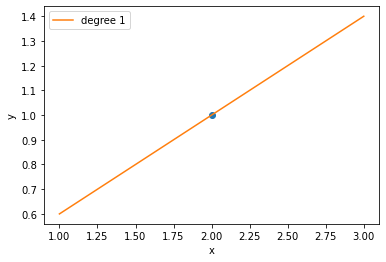

[[ 0.200  0.400]]


In [19]:
try:
    p13 = {'x' : np.array(2), 'y' : np.array([1]), 'k' : [1]}

    np.set_printoptions(formatter={'float': '{: .3f}'.format})

    def run(p):
        x, y = p['x'], p['y']
        cList = [fit(x, y, k) for k in p['k']]
        show(x, y, cList)
        for c in cList:
            print(c.T)
            
    run(p13)
except NameError:
    pass


---
#### Problem 4.4

> What is the approximate norm of the solution (to three decimal digits), and is this result consistent with your results in problem 1.3? Why or why not?

In [20]:
c = np.array([0.2, 0.4])
cnorm = np.linalg.norm(c)


print("The norm of c is {:.3f}".format(c_norm))
print("The results are not consistent with problem 1.3. This happened because the Least Squares method was not preformed in 1.3 whereas in 4.3, the solution was obtained by using Least Squares,providing a better fit. ")

The norm of c is 1.000
The results are not consistent with problem 1.3. This happened because the Least Squares method was not preformed in 1.3 whereas in 4.3, the solution was obtained by using Least Squares,providing a better fit. 


---
#### Problem 4.5

> a. Show the plots and outputs obtained with the code below, and answer the following questions:
>
> b. Are the plot and value of $\mathbf{c}$  from the data in `p33` consistent with your answer to problem 3.3?
>
> c. Give a brief qualitative description of the way(s) in which the curves in the plot from the data in `notes` differ from the curves in Figure 1 of the [notes on data fitting](DataFitting.pdf). The plots in that Figure were computed from the same ten points as in `T.txt` but with a different numerical package.

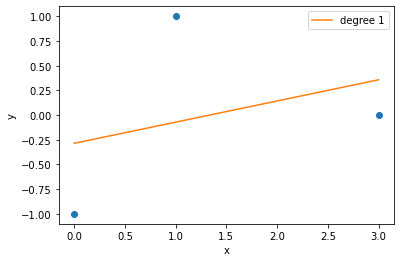

[[-0.286  0.214]]


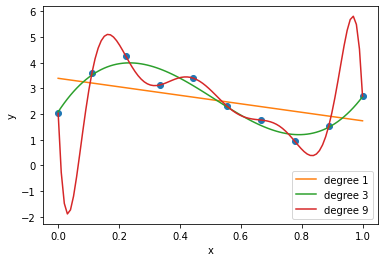

[[ 3.394 -1.655]]
[[ 2.089  18.049 -49.900  32.440]]
[[ 2.030 -292.804  7046.148 -62434.420  285853.947 -759114.988
   1214741.224 -1155128.463  601089.629 -131759.602]]


In [21]:
#a
try:
    p33 = {'x' : np.array([0, 1, 3]), 'y' : np.array([-1, 1, 0]), 'k' : [1]}

    x, y = np.loadtxt('T.txt', unpack=True)
    notes = {'x' :x, 'y' : y, 'k' : [1, 3, 9]}

    run(p33)
    run(notes)
except NameError:
    pass

**ANSWER**

b) the plot and value of  𝐜  from the data in p33 consistent with my answer to problem 3.3 .

c)the curves in the plot from the data in notes do not differ from the curves in Figure 1, They look the same.



\begin{exercise}
Consider the function $f(x) = \frac{1}{1+x^2}$ defined in the interval $[-5,5]$. Write a python program to approximate this function in least squares sense with polynomials $n = 3, 7, 15, 21$ considering 60 uniform points in its interval of definition.

1) Form the normal equations of the LS solution and solve it using LU decomposition.

2) Solve the overdetermined system of LS equations using QR and SVD methods

3) For each solution method of OLS plot the polynomial in the same graph

4) Compute and plot the errors in the same graph for each method.

5) Explain the results.

\end{exercise}


\begin{exercise}
Repeat the above exercise for the dataset `

\end{exercise}


\begin{exercise}
We are given measurements of air pollution, in the form of the concentration
of NO (y=[110.49 73.72 23.39 17.11 20.31 29.37 74.74 117.02 298.04 348.13
294.75 253.78 250.48 239.48 236.52 245.04 286.74 304.78 288.76 247.11 216.73
185.78 171.19 171.73 164.05]), over a period of 24 hours(t=(0:24)), on a busy
street in a major city. Since the NO concentration is mainly due to the cars,
it has maximum values in the morning and in the afternoon, when the traffic
is most intense.
Here, we used the Least-Squares technique of data fitting for the purpose of
approximating measured discrete data; we fitted trigonometric functions to
given data in order to be able to compute smoothed data for any value of the
independent variable (t) in the model (f).

Apply the five steps specified in the previous exercise.
\end{exercise}


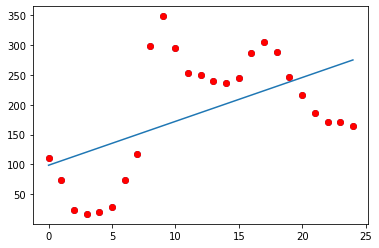

In [34]:
import matplotlib.pyplot as plt
import numpy as np

t =np.array([0, 1 ,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

y_t = np.array([110.49, 73.72, 23.39, 17.11, 20.31, 29.37, 74.74, 117.02, 298.04, 348.13, 294.75, 253.78, 250.48, 239.48, 236.52, 245.04, 286.74, 304.78, 288.76, 247.11, 216.73, 185.78, 171.19, 171.73, 164.05]) 
xn = np.array([min(t),max(t)])
plt.scatter(t,y_t)
m, c = np.polyfit(t, y_t, 1)
yn = np.polyval([m, c], xn)
plt.plot(t, y_t, 'or')

plt.plot(xn, yn)
plt.show()

### Linear Ordinary Least Squares (OLS) Example

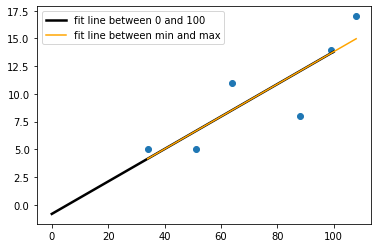

In [122]:
import matplotlib.pyplot as plt
import numpy as np

bill = [34,108,64,88,99,51]
tip =  [5,17,11,8,14,5]  
plt.scatter(bill, tip)

#fit function
f = lambda x: 0.1462*x - 0.8188
# x values of line to plot
x = np.array([0,100])
# plot fit
plt.plot(x,f(x),lw=2.5, c="k",label="fit line between 0 and 100")

#better take min and max of x values
x = np.array([min(bill),max(bill)])
plt.plot(x,f(x), c="orange", label="fit line between min and max")

plt.legend()
plt.show()